### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Code starts here

# Load the train data
train = pd.read_csv(r'/Users/rahulkosamkar/Documents/Data_Science/Projects/Linear_Reg_Lego_collection/train.csv')
train.head(5)


# Shape of the data
print('Shape of the train data is: ',train.shape)

print()

# Statistical properties of the data.
print('Statistical Properties of the train data are as follows: ')
print(train.describe())

# Drop the Id.
train.drop('Id',axis=1,inplace=True)
print()

# Checking for skewness in the features
print('Skewness for the different features is as shown below: ')
print(train.skew())

# Split into features and target
X = train.drop('list_price',axis=1)
y = train['list_price']

# Separate into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=6)


# Code ends here.

Shape of the train data is:  (8582, 11)

Statistical Properties of the train data are as follows: 
              ages   list_price  num_reviews  piece_count  play_star_rating  \
count  8582.000000  8582.000000  8582.000000  8582.000000       8582.000000   
mean     16.649149    64.493463    14.680727   486.677464          3.697809   
std       8.186261    89.871631    34.867561   802.789725          1.653742   
min       0.000000     2.272400     0.000000     1.000000          0.000000   
25%      11.000000    19.990000     1.000000    95.000000          3.600000   
50%      19.000000    36.587800     4.000000   214.000000          4.400000   
75%      23.000000    71.298000    12.000000   544.000000          4.700000   
max      30.000000  1104.870000   367.000000  7541.000000          5.000000   

       review_difficulty  star_rating   theme_name  val_star_rating  \
count        8582.000000  8582.000000  8582.000000      8582.000000   
mean            1.994640     3.904649    20.482

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

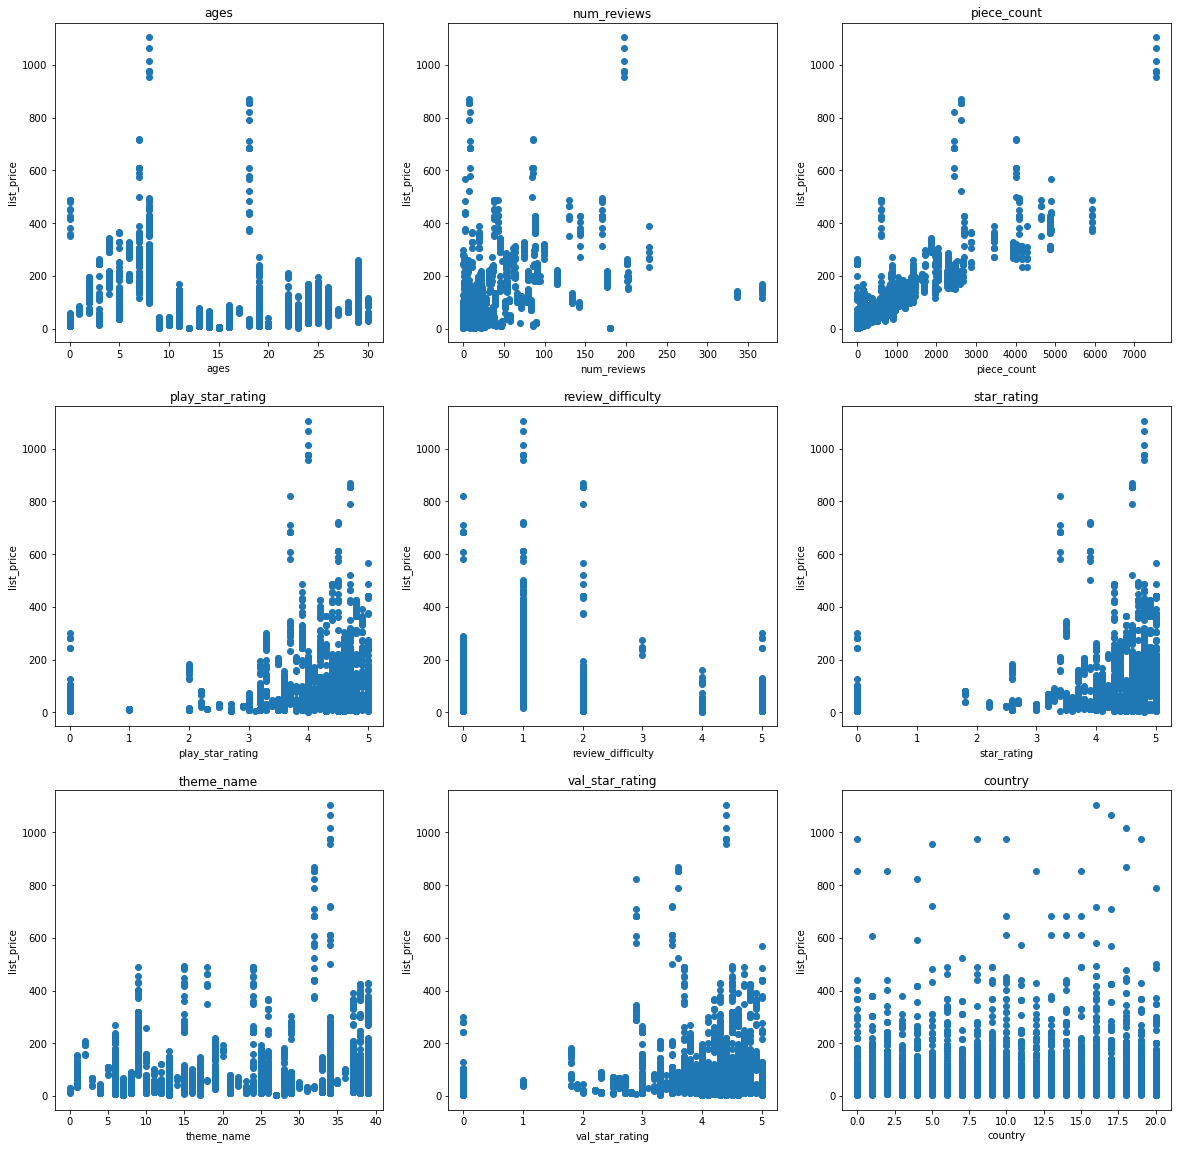

In [6]:
import matplotlib.pyplot as plt

# code starts here        
cols = X_train.columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3): 
            col = cols[i*3 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(X_train[col],y_train)
            axes[i,j].set_xlabel(col)
            axes[i,j].set_ylabel('list_price')
        

# code ends here
plt.show()

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

review_difficulty  play_star_rating    -0.670508
play_star_rating   review_difficulty   -0.670508
val_star_rating    review_difficulty   -0.650333
review_difficulty  val_star_rating     -0.650333
star_rating        review_difficulty   -0.637901
review_difficulty  star_rating         -0.637901
num_reviews        piece_count          0.542924
piece_count        num_reviews          0.542924
list_price         piece_count          0.866119
piece_count        list_price           0.866119
star_rating        play_star_rating     0.902573
play_star_rating   star_rating          0.902573
star_rating        val_star_rating      0.908720
val_star_rating    star_rating          0.908720
play_star_rating   val_star_rating      0.921824
val_star_rating    play_star_rating     0.921824
dtype: float64


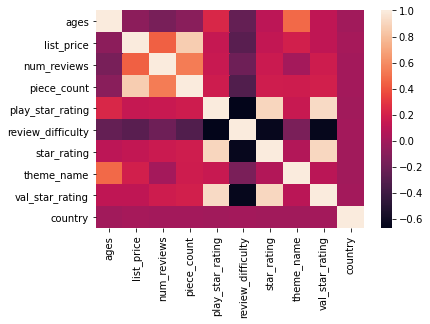

In [7]:
# Code starts here

# Plotting a heatmap using to check for correlation between the features
sns.heatmap(train.corr())

# Selecting upper and lower threshold
upper_threshold = 0.5
lower_threshold = -0.5


# List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')

# Select the highest correlation pairs having correlation greater than upper threshold and lower than lower threshold
corr_var_list = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
print(corr_var_list)

# drop columns from X_train
X_train.drop(['play_star_rating','val_star_rating'],axis = 1 ,inplace=True)

# drop columns from X_test
X_test.drop(['play_star_rating','val_star_rating'], axis = 1 ,inplace=True)

# Code ends here

### Model building

In [8]:
# Code starts here

#Instantiate linear regression model
regressor=LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred =regressor.predict(X_test)

# Calculate mse
mse = mean_squared_error(y_test, y_pred)

# print mse
print(mse)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)

#print r2
print(r2)

# Code ends here

2385.6155401803844
0.7327716226983414


### Residual check!

- Check the distribution of the residual.

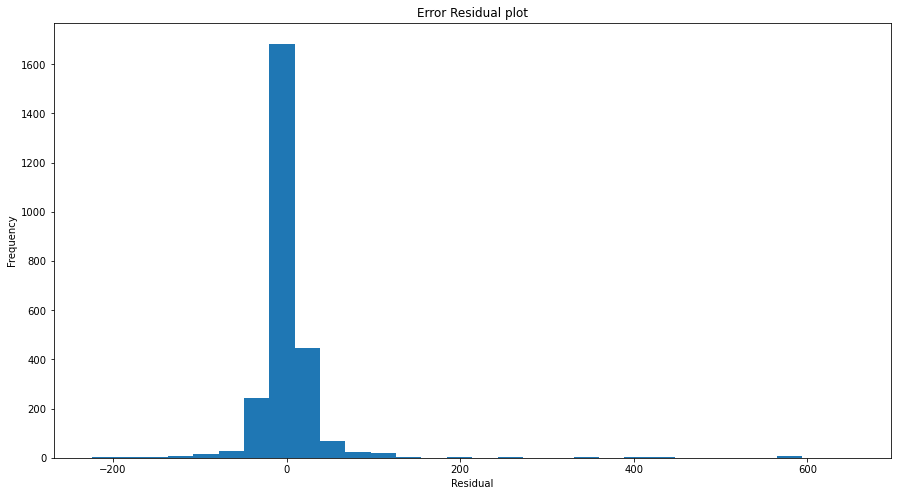

In [9]:
# Code starts here
# calculate the residual
residual = (y_test - y_pred)

# plot the figure for residual
plt.figure(figsize=(15,8))
plt.hist(residual, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")   
plt.title("Error Residual plot")
plt.show()

# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [10]:
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test.drop(['Id','play_star_rating','val_star_rating'],1,inplace=True)


# Predict on the test data
y_pred_test = regressor.predict(test)
print(y_pred_test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'list_price':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission.csv',index=False)

[114.07826338  24.06263899 148.658779   ...  26.21106837  16.39527622
  18.42660112]
